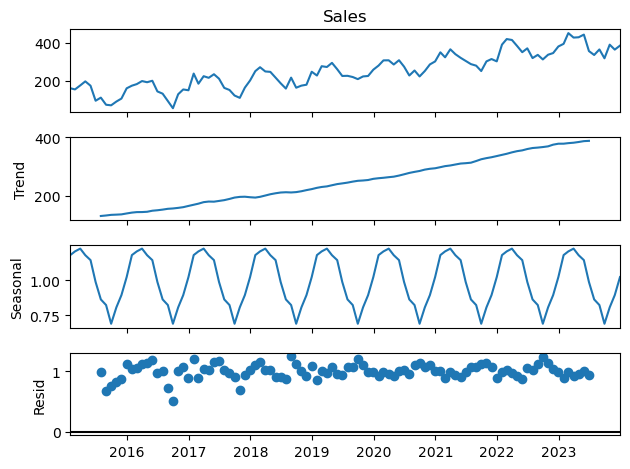

In [20]:
# Generate a date range for the data (e.g., monthly data from 2015 to 2023)
date_rng = pd.date_range(start='2015-01-01', end='2023-12-31', freq='M')
# Simulate retail sales data with trend, seasonality, and noise
np.random.seed(0)  # For reproducibility
trend = np.linspace(100, 400, len(date_rng))  # Linear trend from 100 to 400
seasonal = 50 * np.sin(2 * np.pi * date_rng.month / 12)  # Annual seasonality
noise = np.random.normal(0, 20, len(date_rng))  # Random noise
# Combine trend, seasonal, and noise components to create sales data
sales_data = trend + seasonal + noise
# Create DataFrame
data = pd.DataFrame({'Date': date_rng, 'Sales': sales_data})
data.set_index('Date', inplace=True)
# Decompose the time series data using multiplicative model
decomposition = seasonal_decompose(data['Sales'], model='multiplicative', period=12)
# Plot the decomposed components
decomposition.plot()
plt.show()

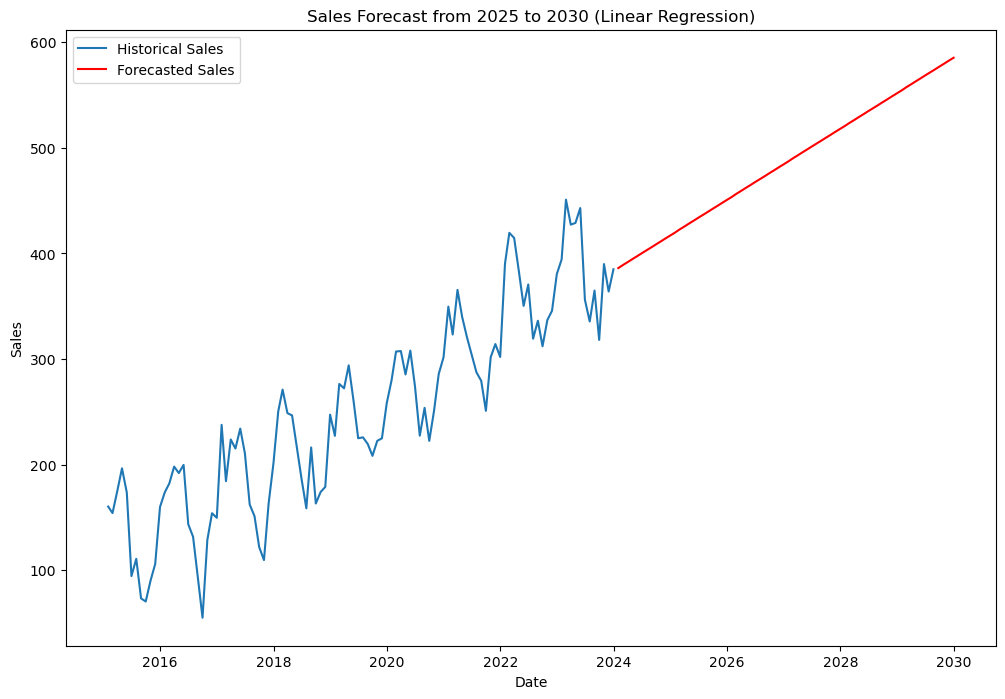

Forecasted values from 2025 to 2030:
[386.15671634 388.96291973 391.76912313 394.57532652 397.38152992
 400.18773332 402.99393671 405.80014011 408.60634351 411.4125469
 414.2187503  417.02495369 419.83115709 422.63736049 425.44356388
 428.24976728 431.05597068 433.86217407 436.66837747 439.47458086
 442.28078426 445.08698766 447.89319105 450.69939445 453.50559784
 456.31180124 459.11800464 461.92420803 464.73041143 467.53661483
 470.34281822 473.14902162 475.95522501 478.76142841 481.56763181
 484.3738352  487.1800386  489.98624199 492.79244539 495.59864879
 498.40485218 501.21105558 504.01725898 506.82346237 509.62966577
 512.43586916 515.24207256 518.04827596 520.85447935 523.66068275
 526.46688615 529.27308954 532.07929294 534.88549633 537.69169973
 540.49790313 543.30410652 546.11030992 548.91651331 551.72271671
 554.52892011 557.3351235  560.1413269  562.9475303  565.75373369
 568.55993709 571.36614048 574.17234388 576.97854728 579.78475067
 582.59095407 585.39715746]


In [18]:
# Extract the trend component
trend = decomposition.trend.dropna()
# Prepare the data for Linear Regression
X = np.array(range(len(trend))).reshape(-1, 1)  # Time as feature (0, 1, 2, ...)
y = trend.values  # Trend values as target
# Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)
# Forecast for the next 72 months (6 years)
future_months = 72
X_future = np.array(range(len(trend), len(trend) + future_months)).reshape(-1, 1)
forecast = model.predict(X_future)
# Create future date range for 2025 to 2030 (monthly)
future_dates = pd.date_range(start='2024-01-01', periods=future_months, freq='M')
# Plot the forecasted values alongside the historical data
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Sales'], label='Historical Sales')
plt.plot(future_dates, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast from 2025 to 2030 (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
# Display the forecasted values
print(f"Forecasted values from 2025 to 2030:")
print(forecast)

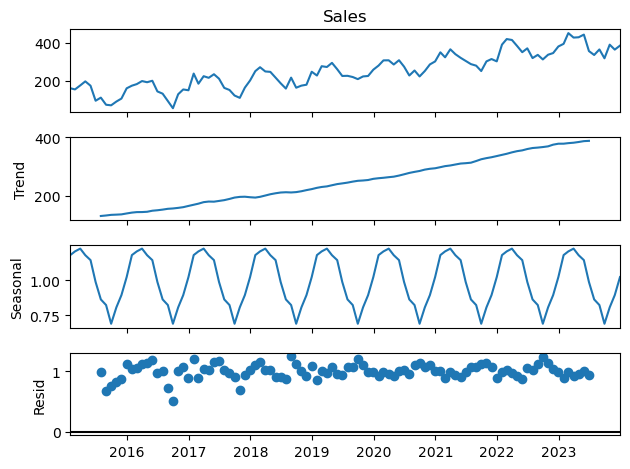

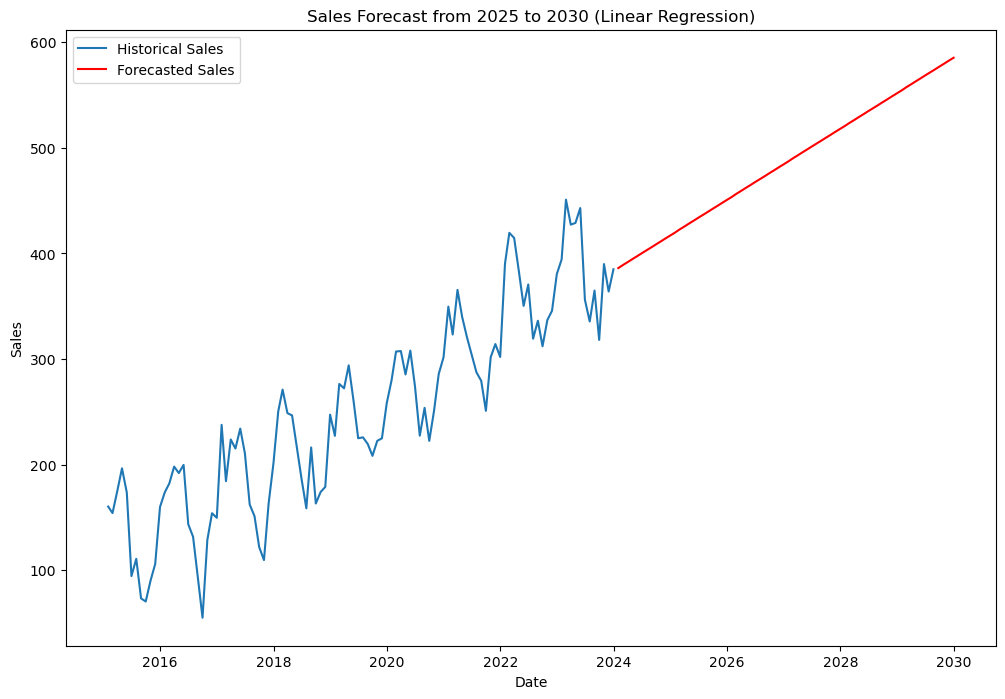

Forecasted values from 2025 to 2030:
[386.15671634 388.96291973 391.76912313 394.57532652 397.38152992
 400.18773332 402.99393671 405.80014011 408.60634351 411.4125469
 414.2187503  417.02495369 419.83115709 422.63736049 425.44356388
 428.24976728 431.05597068 433.86217407 436.66837747 439.47458086
 442.28078426 445.08698766 447.89319105 450.69939445 453.50559784
 456.31180124 459.11800464 461.92420803 464.73041143 467.53661483
 470.34281822 473.14902162 475.95522501 478.76142841 481.56763181
 484.3738352  487.1800386  489.98624199 492.79244539 495.59864879
 498.40485218 501.21105558 504.01725898 506.82346237 509.62966577
 512.43586916 515.24207256 518.04827596 520.85447935 523.66068275
 526.46688615 529.27308954 532.07929294 534.88549633 537.69169973
 540.49790313 543.30410652 546.11030992 548.91651331 551.72271671
 554.52892011 557.3351235  560.1413269  562.9475303  565.75373369
 568.55993709 571.36614048 574.17234388 576.97854728 579.78475067
 582.59095407 585.39715746]


In [19]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate a date range for the data (e.g., monthly data from 2015 to 2023)
date_rng = pd.date_range(start='2015-01-01', end='2023-12-31', freq='M')
# Simulate retail sales data with trend, seasonality, and noise
np.random.seed(0)  # For reproducibility
trend = np.linspace(100, 400, len(date_rng))  # Linear trend from 100 to 400
seasonal = 50 * np.sin(2 * np.pi * date_rng.month / 12)  # Annual seasonality
noise = np.random.normal(0, 20, len(date_rng))  # Random noise
# Combine trend, seasonal, and noise components to create sales data
sales_data = trend + seasonal + noise
# Create DataFrame
data = pd.DataFrame({'Date': date_rng, 'Sales': sales_data})
data.set_index('Date', inplace=True)
# Decompose the time series data using multiplicative model
decomposition = seasonal_decompose(data['Sales'], model='multiplicative', period=12)
# Plot the decomposed components
decomposition.plot()
plt.show()

# Extract the trend component
trend = decomposition.trend.dropna()

# Prepare the data for Linear Regression
# We use the index of the trend as the independent variable (X)
X = np.array(range(len(trend))).reshape(-1, 1)  # Time as feature (0, 1, 2, ...)
y = trend.values  # Trend values as target

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Forecast for the next 72 months (6 years)
future_months = 72
X_future = np.array(range(len(trend), len(trend) + future_months)).reshape(-1, 1)
forecast = model.predict(X_future)

# Create future date range for 2025 to 2030 (monthly)
future_dates = pd.date_range(start='2024-01-01', periods=future_months, freq='M')

# Plot the forecasted values alongside the historical data
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Sales'], label='Historical Sales')
plt.plot(future_dates, forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast from 2025 to 2030 (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Display the forecasted values
print(f"Forecasted values from 2025 to 2030:")
print(forecast)